# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# base url for openweathermap call
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# Create an empty list to hold weather data
cities_data = []

# Print to logger
print("Beginning Data Retrieval")
print ("-" * 15)

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in list
for index, city in enumerate(cities):
    
    # Group cities in sets of 50 for loggin purpose
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the URL and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the city info into the city data list
        cities_data.append({
            "City" :city,
            "Lat" :city_lat,
            "Lng" :city_lng,
            "Max Temp" :city_max_temp,
            "Humidity" :city_humidity,
            "Cloudiness" :city_clouds,
            "Wind Speed" :city_wind,
            "Country" :city_country,
            "Date" :city_date  
        })
    except:
        print("City not found. Skipping ...")
        pass
    # Indicate that data loading is complete
        print("-----------------------")
        print("Data Retrieval Complete")
        print("-----------------------")

Beginning Data Retrieval
---------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | baykit
Processing Record 6 of Set 1 | marcona
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 7 of Set 1 | jiangyou
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 9 of Set 1 | rosetown
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | guadalupe y calvo
Processing Record 16 of Set 1 | kap

Processing Record 7 of Set 4 | west wendover
Processing Record 8 of Set 4 | ardakan
Processing Record 9 of Set 4 | cherskiy
Processing Record 10 of Set 4 | palomares
Processing Record 11 of Set 4 | fort nelson
Processing Record 12 of Set 4 | clyde river
Processing Record 13 of Set 4 | tiarei
Processing Record 14 of Set 4 | aflu
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 15 of Set 4 | victoria
Processing Record 16 of Set 4 | tikapur
Processing Record 17 of Set 4 | manta
Processing Record 18 of Set 4 | samusu
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 19 of Set 4 | moultonborough
Processing Record 20 of Set 4 | chokurdakh
Processing Record 21 of Set 4 | aurangabad
Processing Record 22 of Set 4 | papar
Processing Record 23 of Set 4 | margate
Processing Record 24 of Set 4 | lagoa
Processing Record 25 of Set 4 | kavieng
Processing Record 26 

City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 21 of Set 7 | zhob
Processing Record 22 of Set 7 | mishelevka
Processing Record 23 of Set 7 | sovetskiy
Processing Record 24 of Set 7 | ambanja
Processing Record 25 of Set 7 | de-kastri
Processing Record 26 of Set 7 | naryan-mar
Processing Record 27 of Set 7 | fethiye
Processing Record 28 of Set 7 | atambua
Processing Record 29 of Set 7 | ndele
Processing Record 30 of Set 7 | portland
Processing Record 31 of Set 7 | husavik
Processing Record 32 of Set 7 | leningradskiy
Processing Record 33 of Set 7 | fortuna
Processing Record 34 of Set 7 | aljezur
Processing Record 35 of Set 7 | amuntai
Processing Record 36 of Set 7 | qujing
Processing Record 37 of Set 7 | tornio
Processing Record 38 of Set 7 | neuquen
Processing Record 39 of Set 7 | stornoway
Processing Record 40 of Set 7 | tarasovskiy
Processing Record 41 of Set 7 | nome
Processing Record 42 of Set 7 | kruisfontein
P

Processing Record 35 of Set 10 | effingham
Processing Record 36 of Set 10 | la paz
Processing Record 37 of Set 10 | hede
Processing Record 38 of Set 10 | mendahara
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 39 of Set 10 | zabaykalsk
Processing Record 40 of Set 10 | duma
Processing Record 41 of Set 10 | wagga wagga
Processing Record 42 of Set 10 | petropavlovsk-kamchatskiy
Processing Record 43 of Set 10 | agadez
Processing Record 44 of Set 10 | ilhabela
Processing Record 45 of Set 10 | haines junction
Processing Record 46 of Set 10 | kawambwa
Processing Record 47 of Set 10 | rentina
Processing Record 48 of Set 10 | karasburg
Processing Record 49 of Set 10 | dicabisagan
Processing Record 0 of Set 11 | plattsburgh
Processing Record 1 of Set 11 | po
City not found. Skipping ...
-----------------------
Data Retrieval Complete
-----------------------
Processing Record 2 of Set 11 | port keats
Processing Record 3 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert array of JSON into Pandas
cities_data_df = pd.DataFrame(cities_data)


# Extract relevant fields from the data frame
lats = cities_data_df["Lat"]
max_temps = cities_data_df["Max Temp"]
humidity = cities_data_df["Humidity"]
cloudiness = cities_data_df["Cloudiness"]
wind_speed = cities_data_df["Wind Speed"]

cities_data_df.to_csv(output_data_file, index_label="City_ID")

cities_data_df.count()

City          540
Lat           540
Lng           540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64

In [5]:
# Display the city Data Frame
cities_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.80,-68.30,39.20,86,75,5.82,AR,1602816825
1,bluff,-46.60,168.33,55.00,60,100,10.00,NZ,1602816826
2,punta arenas,-53.15,-70.92,44.60,70,41,17.22,CL,1602816729
3,baykit,61.67,96.37,28.92,91,99,12.21,RU,1602816826
4,jiangyou,31.77,104.72,65.35,58,51,3.56,CN,1602816826


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
cities_data_df[cities_data_df["Humidity"] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.
cities_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,5.400000e+02
mean,20.012778,19.377111,61.566741,71.018519,51.255556,7.595981,1.602817e+09
std,33.044567,92.461288,19.259262,21.371952,39.158986,5.105032,6.695083e+01
min,-54.800000,-175.200000,3.580000,10.000000,0.000000,0.040000,1.602817e+09
25%,-6.315000,-66.430000,46.400000,60.000000,6.500000,3.430000,1.602817e+09
50%,23.505000,25.555000,64.970000,77.000000,56.500000,6.835000,1.602817e+09
75%,47.302500,103.675000,78.580000,87.250000,90.000000,10.317500,1.602817e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,29.080000,1.602817e+09


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# No cities with >100% humidity skipping

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

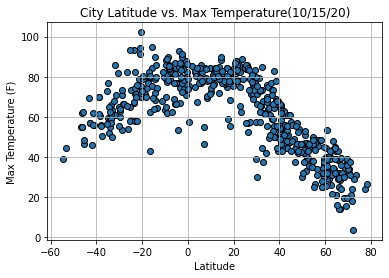

In [8]:
x = cities_data_df['Lat']
y_1 = cities_data_df['Max Temp']

plt.scatter(x, y_1, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Max Temperature(10/15/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#This plot is to demonstrate if the city latitude has a corelation to max temperatures.
#We can see that temperatures rise near 0 latitude - near the equator where temps are warmest.

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

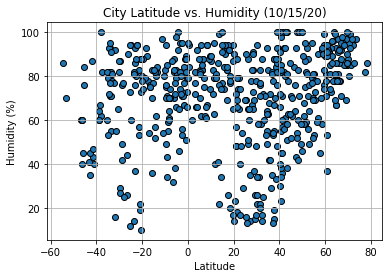

In [9]:
y_2 = cities_data_df['Humidity']

plt.scatter(x, y_2, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Humidity (10/15/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

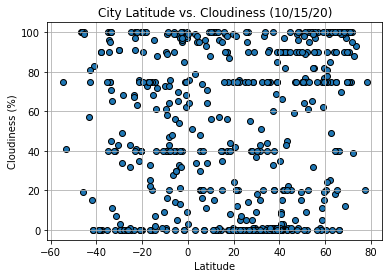

In [10]:
y_3 = cities_data_df['Cloudiness']

plt.scatter(x, y_3, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Cloudiness (10/15/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (%)')

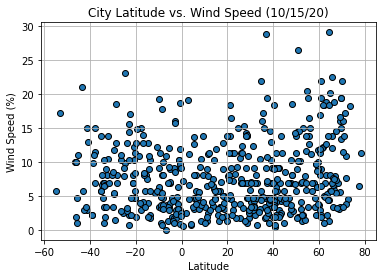

In [12]:
y_4 = cities_data_df['Wind Speed']

plt.scatter(x, y_4, edgecolors = 'black')
plt.grid(axis = 'both')
plt.title('City Latitude vs. Wind Speed (10/15/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-value is: {rvalue}")
    plt.show()

In [14]:
north = cities_data_df.loc[cities_data_df['Lat'] >= 0]
south = cities_data_df.loc[cities_data_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8773238671780578


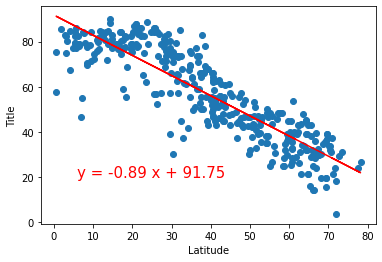

In [15]:
x_values = north ["Lat"]
y_values = north ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,20))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6538671189291393


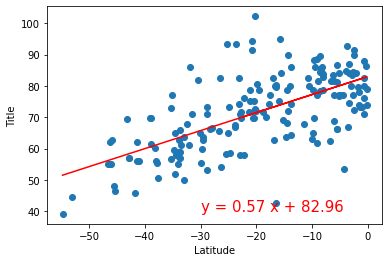

In [16]:
x_values = south ["Lat"]
y_values = south ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.22799226784990576


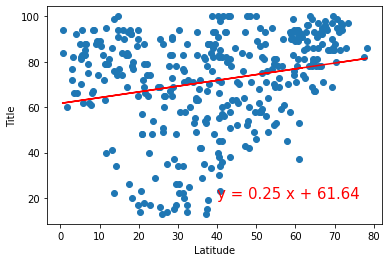

In [17]:
x_values = north ["Lat"]
y_values = north ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.18167379533234343


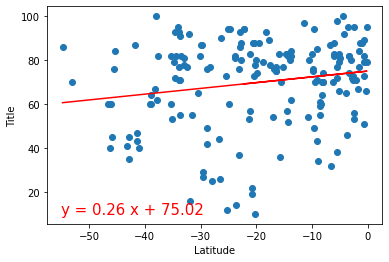

In [18]:
x_values = south ["Lat"]
y_values = south ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-55,10))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.28242584733819853


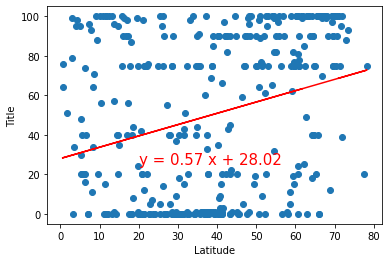

In [19]:
x_values = north ["Lat"]
y_values = north ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (20,25))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.009573770550918561


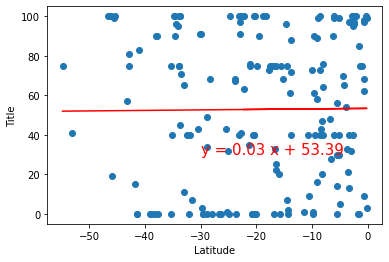

In [20]:
x_values = south ["Lat"]
y_values = south ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.26377365464606045


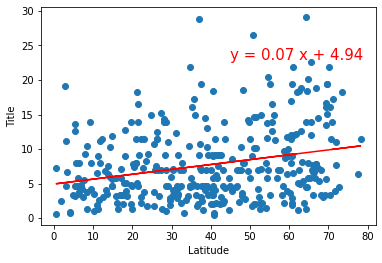

In [21]:
x_values = north ["Lat"]
y_values = north ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (45,23))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.14858131664174698


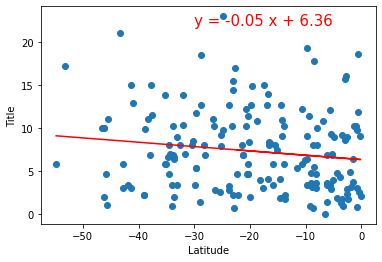

In [22]:
x_values = south ["Lat"]
y_values = south ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,22))